In [5]:
import re
import os
import time
import random
import requests
import gensim
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from os import system
from math import floor
from copy import deepcopy
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.common.exceptions import TimeoutException
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from nltk.stem import WordNetLemmatizer
from gensim.parsing.preprocessing import STOPWORDS

In [363]:
towny=pd.read_csv('towny_df')

In [364]:
towny.head()

,town,biz,com_elec_ghg,com_gas_1kdol,com_gas_ghg,com_gas_mcf,houses,ind,ind_elec_ghg,ind_gas_1kdol,...,ind_gas_mcf,pop,res_elec_ghg,res_gas_1kdol,res_gas_ghg,res_gas_mcf,age,edu,income,poverty
0,"Bismarck, ND",927.0,337550656.0,4000.0,88869152.0,740313.0,29680.0,290.0,262308579.0,2668.0,...,1018298.0,68981.0,271312168.0,11497.0,188394738.0,1569398.0,37.1,93.1,61477,9.5
1,"Ridgewood, NJ",653.0,202329017.0,2790.0,46272451.0,385467.0,8335.0,88.0,4662251.0,133.0,...,20205.0,25430.0,155528162.0,7578.0,121772514.0,1014410.0,41.3,97.1,162011,4.4
2,"Natchez, MS",513.0,154290472.0,1013.0,16820605.0,140122.0,6235.0,179.0,13753718.0,272.0,...,62632.0,15345.0,140880520.0,2100.0,25006228.0,208311.0,39.7,86.5,28089,35.9
3,"Southaven, MS",630.0,582120118.0,2371.0,39360611.0,327888.0,18386.0,134.0,89281642.0,1674.0,...,384871.0,51816.0,451151482.0,6928.0,82754153.0,689373.0,36.0,88.5,60093,11.1
4,"Garfield, NJ",535.0,118919226.0,2349.0,38970852.0,324642.0,10987.0,159.0,25168153.0,719.0,...,109074.0,31456.0,140232090.0,5885.0,94566190.0,787771.0,36.3,84.4,54063,17.7


In [6]:
towns=pd.read_csv('normalized_towns')

In [69]:
towns.shape

(1065, 20)

In [8]:
names=towns['town']
# names_=names.apply(lambda u: '_'.join(u.split(', ')))
names_=names.apply(lambda u: u.replace(' ',' ').replace(',',''))
names_.head()

0     Bismarck ND
1    Ridgewood NJ
2      Natchez MS
3    Southaven MS
4     Garfield NJ
Name: town, dtype: object

In [548]:
driver = webdriver.Chrome()

In [549]:
driver.get('https://en.wikipedia.org/wiki/Hanover_Park,_Illinois')

In [ ]:
#give a full text (wiki page) and return a string of paragraphs greater than 30 words
def paragraph_splitter(text):
    paragraph= []
    rows=text.split('\n')
    for i in rows:
        texty = ''
        try:
            if (i != None):
                    if len(i.split()) >=20:
                            texty += i
        except:
            texty += 1
            print('ooga booga, your data is poopa')
        if texty!='':
            paragraph.append(texty)
    return ''.join(paragraph)
droop=paragraph_splitter(text)

In [101]:
def get_text_from_wiki(name):
    enter_text=driver.find_element_by_xpath('//*[@id="searchInput"]')
    enter_text.clear()
    enter_text.send_keys(name)
    driver.find_element_by_xpath('//*[@id="searchButton"]').click()
    time.sleep(.5)
    try:
        driver.find_element_by_xpath('//*[@id="mw-content-text"]/div[3]/ul/li[1]/div[1]/a').click()
    except:
        print('straight to page')
    return driver.find_element_by_xpath('//*[@id="bodyContent"]').text
    

In [66]:
# texts=[]
# for i,name in enumerate(names_):
#     print(name)
#     textt=get_text_from_wiki(name)
#     chunk_text=paragraph_splitter(textt)
#     print(f'{i}|{name}: chars:{len(chunk_text)}')
#     texts.append(chunk_text)

Bismarck ND
lmao no way
0|Bismarck ND: chars:20915
Ridgewood NJ
1|Ridgewood NJ: chars:62229
Natchez MS
2|Natchez MS: chars:319
Southaven MS
3|Southaven MS: chars:6803
Garfield NJ
4|Garfield NJ: chars:26921
Strongsville OH
5|Strongsville OH: chars:7715
Holly Springs NC
lmao no way
6|Holly Springs NC: chars:12205
Ridgefield CT
7|Ridgefield CT: chars:166
Orlando FL
lmao no way
8|Orlando FL: chars:59698
Kenosha WI
lmao no way
9|Kenosha WI: chars:319
Green Cove Springs FL
10|Green Cove Springs FL: chars:485
Adrian MI
11|Adrian MI: chars:9207
West Chicago IL
12|West Chicago IL: chars:8699
Kennewick WA
13|Kennewick WA: chars:165
Rock Hill SC
14|Rock Hill SC: chars:790
Minot ND
15|Minot ND: chars:23470
Norman OK
16|Norman OK: chars:37742
Loveland OH
lmao no way
17|Loveland OH: chars:36724
Pickerington OH
lmao no way
18|Pickerington OH: chars:36724
Logansport IN
19|Logansport IN: chars:321
Lake Villa IL
20|Lake Villa IL: chars:0
Bountiful UT
21|Bountiful UT: chars:4615
Elyria OH
22|Elyria OH: c

184|New Albany IN: chars:14186
Lumberton NC
185|Lumberton NC: chars:9052
Holland MI
lmao no way
186|Holland MI: chars:13362
Burbank IL
187|Burbank IL: chars:6490
New Philadelphia OH
188|New Philadelphia OH: chars:7602
District Heights MD
189|District Heights MD: chars:9470
Pensacola FL
190|Pensacola FL: chars:318
Summerville SC
191|Summerville SC: chars:307
Nampa ID
lmao no way
192|Nampa ID: chars:0
Dedham MA
lmao no way
193|Dedham MA: chars:0
Chelsea MA
lmao no way
194|Chelsea MA: chars:155
Fernandina Beach FL
195|Fernandina Beach FL: chars:15943
Bergenfield NJ
196|Bergenfield NJ: chars:38472
Huntington NY
lmao no way
197|Huntington NY: chars:3216
Union City NJ
198|Union City NJ: chars:72724
Roselle IL
lmao no way
199|Roselle IL: chars:476
Tallahassee FL
200|Tallahassee FL: chars:37942
Faribault MN
201|Faribault MN: chars:10392
Douglasville GA
202|Douglasville GA: chars:168
Acworth GA
lmao no way
203|Acworth GA: chars:0
Lititz PA
204|Lititz PA: chars:318
Urbandale IA
lmao no way
205|U

lmao no way
366|Baltimore MD: chars:0
Pembroke Pines FL
367|Pembroke Pines FL: chars:14962
Miami Beach FL
lmao no way
368|Miami Beach FL: chars:167
Reynoldsburg OH
369|Reynoldsburg OH: chars:643
Dearborn MI
lmao no way
370|Dearborn MI: chars:0
Oak Park MI
371|Oak Park MI: chars:33609
Kaukauna WI
372|Kaukauna WI: chars:7496
Westfield MA
373|Westfield MA: chars:15750
Lawndale CA
374|Lawndale CA: chars:316
Englishtown NJ
375|Englishtown NJ: chars:23948
De Pere WI
376|De Pere WI: chars:6037
West Haven CT
377|West Haven CT: chars:320
Peachtree City GA
378|Peachtree City GA: chars:9956
Clarksburg WV
379|Clarksburg WV: chars:166
Muscatine IA
380|Muscatine IA: chars:19086
Janesville WI
381|Janesville WI: chars:22248
Front Royal VA
382|Front Royal VA: chars:14866
Huntley IL
383|Huntley IL: chars:8940
Glendale AZ
384|Glendale AZ: chars:9622
Chester PA
385|Chester PA: chars:315
Port Richey FL
386|Port Richey FL: chars:5283
Powder Springs GA
387|Powder Springs GA: chars:6007
San Pablo CA
388|San P

547|Maineville OH: chars:3451
Willoughby OH
548|Willoughby OH: chars:166
Horn Lake MS
lmao no way
549|Horn Lake MS: chars:0
Belmont MA
550|Belmont MA: chars:16162
Chesterton IN
551|Chesterton IN: chars:28810
Quakertown PA
552|Quakertown PA: chars:11470
Chillicothe OH
553|Chillicothe OH: chars:15224
Evanston IL
lmao no way
554|Evanston IL: chars:21626
Eastpointe MI
555|Eastpointe MI: chars:9324
Owensboro KY
556|Owensboro KY: chars:16817
Gaithersburg MD
557|Gaithersburg MD: chars:15197
Hopewell VA
558|Hopewell VA: chars:17311
McAllen TX
559|McAllen TX: chars:19384
Kansas City MO
lmao no way
560|Kansas City MO: chars:66825
Flemington NJ
561|Flemington NJ: chars:28662
Worcester MA
lmao no way
562|Worcester MA: chars:47012
Leesburg VA
563|Leesburg VA: chars:21638
Bridgewater NJ
lmao no way
564|Bridgewater NJ: chars:40581
New Haven CT
565|New Haven CT: chars:73795
Bradenton FL
lmao no way
566|Bradenton FL: chars:10712
Savannah GA
lmao no way
567|Savannah GA: chars:35116
Fishers IN
568|Fisher

lmao no way
728|Andover MA: chars:0
Mooresville NC
729|Mooresville NC: chars:478
East Stroudsburg PA
730|East Stroudsburg PA: chars:10891
DeSoto TX
731|DeSoto TX: chars:8698
Lemont IL
732|Lemont IL: chars:15562
New Castle PA
lmao no way
733|New Castle PA: chars:24265
Bozeman MT
734|Bozeman MT: chars:163
Chelmsford MA
lmao no way
735|Chelmsford MA: chars:0
Rolla MO
736|Rolla MO: chars:8864
Ashland OH
737|Ashland OH: chars:317
Coachella CA
738|Coachella CA: chars:16226
Neenah WI
lmao no way
739|Neenah WI: chars:5565
Hephzibah GA
740|Hephzibah GA: chars:3556
Harrisburg PA
lmao no way
741|Harrisburg PA: chars:51504
Panama City FL
742|Panama City FL: chars:167
Westmont IL
lmao no way
743|Westmont IL: chars:8593
Latrobe PA
744|Latrobe PA: chars:314
Freehold NJ
lmao no way
745|Freehold NJ: chars:0
Fargo ND
lmao no way
746|Fargo ND: chars:28048
Lincoln NE
lmao no way
747|Lincoln NE: chars:47706
Lawrence MA
lmao no way
748|Lawrence MA: chars:33819
Concord NH
lmao no way
749|Concord NH: chars:15

908|Sarasota FL: chars:33872
Tuscaloosa AL
909|Tuscaloosa AL: chars:51509
Wayne NJ
910|Wayne NJ: chars:42123
Blacksburg VA
911|Blacksburg VA: chars:31919
Caldwell NJ
912|Caldwell NJ: chars:34521
Ashtabula OH
913|Ashtabula OH: chars:15161
Irwin PA
914|Irwin PA: chars:3499
Lebanon PA
915|Lebanon PA: chars:14537
Niagara Falls NY
916|Niagara Falls NY: chars:20022
Euless TX
917|Euless TX: chars:7464
Brick NJ
918|Brick NJ: chars:37775
Erie PA
lmao no way
919|Erie PA: chars:37529
Winter Haven FL
920|Winter Haven FL: chars:16006
Crawfordsville IN
921|Crawfordsville IN: chars:16486
Ada OK
922|Ada OK: chars:10241
Portland ME
lmao no way
923|Portland ME: chars:34845
Fall River MA
924|Fall River MA: chars:46670
Stratford CT
925|Stratford CT: chars:16826
Merrimack NH
926|Merrimack NH: chars:165
Victoria TX
927|Victoria TX: chars:12490
North Canton OH
928|North Canton OH: chars:5008
Vienna VA
929|Vienna VA: chars:15434
Springboro OH
930|Springboro OH: chars:10443
Baton Rouge LA
931|Baton Rouge LA: c

In [52]:
len(text)

77539

In [74]:
towns['text']=texts

In [82]:
towns.set_index('town',inplace=True)

In [92]:
len(towns['text']['Wausau, WI'].split())

3702

In [550]:
didnt_work=[]
for i, town in towns.iterrows():
    if len(town['text'])<1000:
        print (f'{i} len:{len(town.text)}')
        didnt_work.append(i)

In [136]:
towns['text']['Springfield, PA']

"Springfield Township is a township in Montgomery County, Pennsylvania, United States. The population was 19,418 at the 2010 census. It includes the villages of Wyndmoor, Erdenheim, Flourtown, and Oreland. The communities of Lafayette Hill, Fort Washington, Laverock, North Hills, Miquon, and Glenside are also partly inside the Township.According to the United States Census Bureau, the township has a total area of 6.8 square miles (17.6 km2), of which, 6.8 square miles (17.6 km2) of it is land and 0.15% is water.The township is bordered in Montgomery County by (clockwise from west) Whitemarsh Township to the west, Upper Dublin Township to the north, shares a corner with Abington Township to the northeast, and Cheltenham Township to the east. In Philadelphia, it is adjacent to Cedarbrook to the southeast (along Ivy Hill Rd.), shares a corner with East Mount Airy to the south (Stenton and Ivy Hill), and Chestnut Hill to the southwest (along Stenton Ave.)As of the 2010 census, the township

In [551]:
round3={}
for name,town in towns.loc[didnt_work].iterrows():
    print(name)
    add_town=name+' town'
    textt=get_text_from_wiki(add_town)
    chunk_text=paragraph_splitter(textt)
    print(f'{name}: chars:{len(chunk_text)}')
    round3.update({name:chunk_text})


In [128]:

textt=get_text_from_wiki('Springfield Township, Montgomery County, Pennsylvania')
chunk_text=paragraph_splitter(textt)
print(f'{name}: chars:{len(chunk_text)}')
round3.update({'Springfield, PA':chunk_text})

straight to page
Springfield, PA: chars:3283


'Davison is a city in Genesee County in the U.S. state of Michigan and a suburb of Flint. The population was 5,536 at the 2000 census and fell to 5,173 by the 2010 census.[6] Davison is located within Davison Township survey township area (7N 8E), but is administratively autonomous.Davison was named after Judge Norman Davison, a judge of Lapeer County and a delegate to state constitution convention of 1835.[7] He resided in a nearby hamlet formerly known as Davisonville, now known as Atlas.[8]Township section 3, 9 and 10 was Davison Station, which was first settled in 1842 by Eleazer Thurston in section 10. The line of the Chicago and Lake Huron Railroad (now Canadian National Railway) through the settlement was finished in 1871 marked the beginning of Davison Station. The first saw mill in the township was also built here that year by Dunn and Darling. The township and the settlement had in 1872 a number of firsts: doctor, L. W. Hanson, merchant Damon Stewart and tavern owned and oper

In [131]:
for key in round3.keys():
    towns['text'][key]=round3[key]


/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [234]:
def clean_text(town):
    town_=[]
    for word in town.split():
        if not '[' in word and not ']' in word:
            for symbol in """(),.?!'"\n""":
                word=word.replace(symbol,'').lower()
            if (not hasNumbers(word))&(word not in bad_words):
                        town_.append(word)
    return town_

In [504]:
bad_words=[st.lower() for st in us_state_abbrev.keys()]+['','township','jersey','york','chicago']+[st.lower() for st in months]

In [156]:
def hasNumbers(inputString):
    return any(char.isdigit() for char in inputString)

In [207]:
def lemmatize(text):
#     print('token',word)
    return WordNetLemmatizer().lemmatize(text, pos='v')
def preprocess(text):
    result = []
    for token in text:
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
            result.append(lemmatize(token))
    return result

In [158]:
def word_vect(text):
    words=clean_text(text)
    return preprocess(words)


In [149]:
towns['text'].map()

Index(['Bismarck, ND', 'Ridgewood, NJ', 'Natchez, MS', 'Southaven, MS',
       'Garfield, NJ', 'Strongsville, OH', 'Holly Springs, NC',
       'Ridgefield, CT', 'Orlando, FL', 'Kenosha, WI',
       ...
       'Sheboygan, WI', 'Piscataway, NJ', 'Cocoa, FL', 'Cartersville, GA',
       'Chatsworth, GA', 'Grandville, MI', 'New Britain, CT', 'Northville, MI',
       'Waltham, MA', 'Butler, PA'],
      dtype='object', name='town', length=1065)

In [480]:
dictionary = gensim.corpora.Dictionary(towns['text'].apply(word_vect))

In [481]:
dictionary.filter_extremes(no_below=20, no_above=0.66, keep_n=10000)

In [514]:
len(dictionary)

6072

In [505]:
bow_corpus = [dictionary.doc2bow(town) for town in towns['text'].apply(word_vect)]
# bow_corpus[4310]

In [220]:
bow_doc_21 = bow_corpus[23]
for i in range(len(bow_doc_21)):
    print("Word {} (\"{}\") appears {} time.".format(bow_doc_21[i][0], 
                                               dictionary[bow_doc_21[i][0]], 
                                                bow_doc_21[i][1]))

Word 2 ("acres") appears 4 time.
Word 4 ("add") appears 1 time.
Word 8 ("airport") appears 3 time.
Word 12 ("america") appears 1 time.
Word 18 ("archive") appears 1 time.
Word 21 ("army") appears 2 time.
Word 23 ("arts") appears 1 time.
Word 24 ("association") appears 4 time.
Word 32 ("available") appears 1 time.
Word 39 ("battle") appears 1 time.
Word 43 ("black") appears 3 time.
Word 46 ("board") appears 1 time.
Word 49 ("bowl") appears 3 time.
Word 51 ("burn") appears 2 time.
Word 64 ("cavalry") appears 2 time.
Word 65 ("central") appears 4 time.
Word 67 ("chamber") appears 1 time.
Word 71 ("characterize") appears 1 time.
Word 75 ("christian") appears 16 time.
Word 77 ("citizens") appears 2 time.
Word 81 ("claim") appears 1 time.
Word 82 ("clark") appears 1 time.
Word 84 ("climate") appears 4 time.
Word 85 ("closest") appears 1 time.
Word 91 ("college") appears 3 time.
Word 93 ("come") appears 3 time.
Word 95 ("commercial") appears 1 time.
Word 100 ("company") appears 4 time.
Word 1

In [506]:
lda_model = gensim.models.LdaMulticore(bow_corpus, num_topics=5, id2word=dictionary, passes=4, workers=2)

In [538]:
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.005*"downtown" + 0.005*"university" + 0.004*"college" + 0.004*"largest" + 0.004*"major" + 0.004*"company" + 0.004*"historic" + 0.003*"citys" + 0.003*"provide" + 0.003*"station"
Topic: 1 
Words: 0.013*"lake" + 0.007*"village" + 0.005*"road" + 0.005*"creek" + 0.004*"downtown" + 0.004*"heights" + 0.003*"valley" + 0.003*"hill" + 0.003*"station" + 0.003*"route"
Topic: 2 
Words: 0.005*"retrieve" + 0.004*"boston" + 0.004*"detroit" + 0.004*"downtown" + 0.003*"lake" + 0.003*"company" + 0.003*"citys" + 0.003*"station" + 0.003*"hill" + 0.003*"hampshire"
Topic: 3 
Words: 0.004*"company" + 0.004*"university" + 0.004*"fall" + 0.004*"citys" + 0.004*"station" + 0.004*"downtown" + 0.004*"largest" + 0.003*"valley" + 0.003*"route" + 0.003*"retrieve"
Topic: 4 
Words: 0.022*"access" + 0.007*"vote" + 0.005*"beach" + 0.005*"register" + 0.004*"mayor" + 0.004*"election" + 0.004*"council" + 0.004*"general" + 0.004*"term" + 0.004*"bear"


In [287]:
n=959
print('state: {}'.format(towns.index[n]))
for index, score in sorted(lda_model[bow_corpus[n]], key=lambda tup: -1*tup[1]):
    print("\nScore: {}\t \nTopic: {}".format(score, lda_model.print_topic(index, 10)))

state: New York, NY

Score: 0.877528965473175	 
Topic: 0.006*"university" + 0.005*"downtown" + 0.005*"lake" + 0.004*"beach" + 0.004*"citys" + 0.004*"largest" + 0.004*"major" + 0.004*"station" + 0.003*"road" + 0.003*"retrieve"

Score: 0.10133116692304611	 
Topic: 0.022*"access" + 0.010*"township" + 0.007*"vote" + 0.005*"register" + 0.005*"election" + 0.004*"general" + 0.004*"council" + 0.004*"mayor" + 0.004*"bear" + 0.004*"department"

Score: 0.014237895607948303	 
Topic: 0.005*"lake" + 0.004*"fall" + 0.004*"creek" + 0.004*"haven" + 0.003*"church" + 0.003*"company" + 0.003*"route" + 0.003*"retrieve" + 0.003*"historic" + 0.003*"provide"


In [286]:
towns['num']=listy
towns.loc['New York, NY'].num

959

In [291]:
lda_model.top_topics(bow_corpus)

[([(0.004156151, 'downtown'),
   (0.0038844752, 'company'),
   (0.0036114412, 'historic'),
   (0.0035671038, 'valley'),
   (0.0032929054, 'railroad'),
   (0.003196989, 'route'),
   (0.003184268, 'township'),
   (0.0031052895, 'citys'),
   (0.0030665111, 'station'),
   (0.003050627, 'largest'),
   (0.0029293231, 'hill'),
   (0.0028368605, 'fall'),
   (0.0028063185, 'college'),
   (0.0027435424, 'provide'),
   (0.002703312, 'major'),
   (0.0025383641, 'carolina'),
   (0.0025280842, 'century'),
   (0.002511401, 'main'),
   (0.0024643065, 'establish'),
   (0.0023014245, 'university')],
  -0.5253494505940461),
 ([(0.0054503754, 'lake'),
   (0.0038352392, 'fall'),
   (0.003815045, 'creek'),
   (0.0037405703, 'haven'),
   (0.0032670042, 'church'),
   (0.0032387488, 'company'),
   (0.003212217, 'route'),
   (0.003188344, 'retrieve'),
   (0.003068206, 'historic'),
   (0.002999516, 'provide'),
   (0.0029306198, 'station'),
   (0.0028857545, 'downtown'),
   (0.0028464673, 'hill'),
   (0.002830734

In [485]:
town_scores=[]
for i, row in towns.iterrows():
    score=[0,0,0,0,0]
    for tup in lda_model[bow_corpus[row.num]]:
#         print(tup[0])
        score[tup[0]]=tup[1]
#     print(i)
    town_scores.append(score)

In [508]:
dicty=[town_scores[i] for i in range(len(town_scores))]
for i in range(5):
    towns['topic{}'.format(i)]=[dicty[k][i] for k in range(len(town_scores))]

In [509]:
for i in range(5):
    print('topic {}:\n{}'.format(i,sector_split_tot.loc[sector_split_tot['topic{}'.format(i)]>.501][['com','ind','res']].mean()))
# towns.loc[towns.topic0>.501].shape

topic 0:
com    6960.979625
ind    6318.497443
res    7243.544263
dtype: float64
topic 1:
com    8270.724823
ind    3323.125104
res    8335.322243
dtype: float64
topic 2:
com    5603.575747
ind    4471.545773
res    7203.452094
dtype: float64
topic 3:
com    7342.080260
ind    8825.958308
res    8819.619100
dtype: float64
topic 4:
com    6628.151922
ind    8616.329350
res    7940.185260
dtype: float64


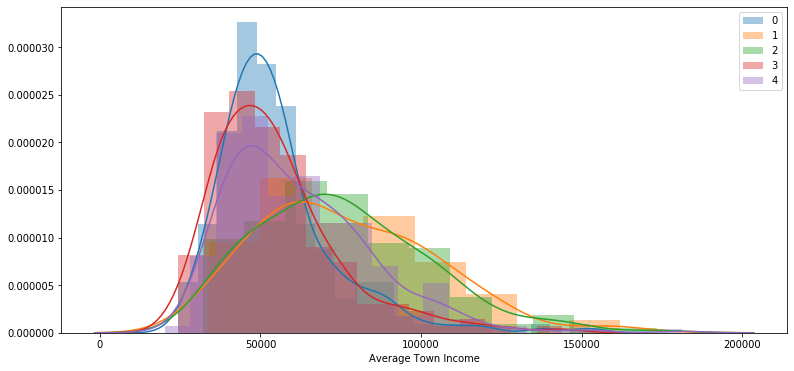

In [544]:
plt.figure(figsize=(13,6))
for i in range(5):
    sns.distplot(towny.loc[towny['topic{}'.format(i)]>.501]['income'],label=i)

plt.xlabel('Average Town Income')
plt.legend()

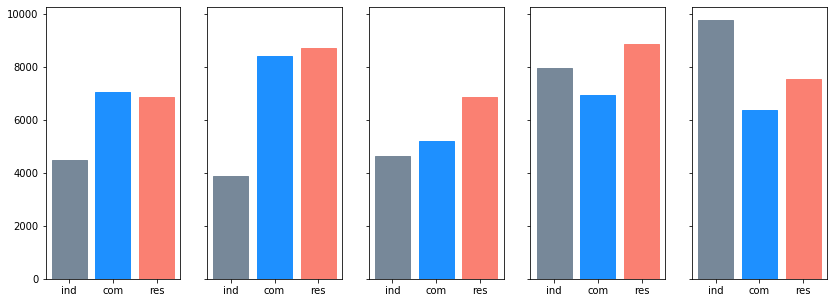

In [545]:
nummer=[{},{},{},{},{}]
for i in range(5):
    for j,thang in enumerate(['ind','com','res']):
#         print(sector_split_tot.loc[sector_split_tot['topic{}'.format(i)]>.501][thang].mean())
        nummer[i].update({thang:sector_split_tot.loc[sector_split_tot['topic{}'.format(i)]>.9][thang].mean()})
# plt.figure(figsize=(5,7))
fig, axs = plt.subplots(1,5,figsize=(14,5),sharey='row')
for l in range(5):
    nums=pd.DataFrame(nummer[l],index=['%Carbon Emission']).transpose()
#     print(nums)
    # fig=sns.barplot(x=nums.index,y=nums['%Carbon Emission']).
#     print(nums.index)
    barlist=axs[l].bar(nums.index,nums['%Carbon Emission'])
    # plt.plot(fig)
    barlist[0].set_color('lightslategray')
    barlist[1].set_color('dodgerblue')
    barlist[2].set_color('salmon')
# fig.figsize(10,5)
# plt.title('Percent Carbon Emission by Sector')
plt.show()

In [547]:
for i in range(5):
    print(towny.loc[sector_split_tot['topic{}'.format(i)]>.501].sort_values('pop',ascending=False)['town'].head(4))

959       New York, NY
403    Los Angeles, CA
111        Chicago, IL
823        Houston, TX
Name: town, dtype: object
312    Hempstead, NY
769       Newark, NJ
993    Elizabeth, NJ
768       Edison, NJ
Name: town, dtype: object
92         Cary, NC
129      Joliet, IL
646    Thornton, CO
472      Peoria, IL
Name: town, dtype: object
168     Fort Worth, TX
1006       Detroit, MI
252      Milwaukee, WI
700     Pittsburgh, PA
Name: town, dtype: object
117       Buffalo, NY
696       Hialeah, FL
981    Chesapeake, VA
197    Huntington, NY
Name: town, dtype: object


In [371]:
com=(towny['com_elec_ghg']+towny['com_gas_ghg'])/towny['pop']
ind=(towny['ind_elec_ghg']+towny['ind_gas_ghg'])/towny['pop']
res=(towny['res_elec_ghg']+towny['res_gas_ghg'])/towny['pop']
tot=com+ind+res
sector_split_tot=pd.DataFrame({'com':com,'ind':ind,'res':res},columns=['com','ind','res'])

In [372]:
sector_split_tot

,com,ind,res
0,6181.699424,5574.691683,6664.254012
1,9775.913016,278.716123,10904.470153
2,11150.933659,1386.263995,10810.475595
3,11993.992763,2614.686197,10303.875926
4,5019.394646,1216.355862,7464.340031
5,8285.005356,5488.043207,9577.566492
6,1936.421895,358.815641,6408.791210
7,4310.951449,2099.507826,5123.009277
8,10103.208985,1110.797316,7137.306829
9,6658.469063,3017.352736,8230.382246


In [498]:
for i in range(5):
    print('{} amount: {}'.format(i,towny.loc[sector_split_tot['topic{}'.format(i)]>.501].shape[0]))

0 amount: 186
1 amount: 92
2 amount: 166
3 amount: 168
4 amount: 355


In [516]:
us_state_abbrev = {
    'Alabama': 'AL',    'Alaska': 'AK',    'Arizona': 'AZ',    'Arkansas': 'AR',    'California': 'CA',    'Colorado': 'CO',    'Connecticut': 'CT',    'Delaware': 'DE',    'District of Columbia': 'DC',    'Florida': 'FL',    'Georgia': 'GA',    'Hawaii': 'HI',    'Idaho': 'ID',    'Illinois': 'IL',    'Indiana': 'IN',    'Iowa': 'IA',    'Kansas': 'KS',    'Kentucky': 'KY',    'Louisiana': 'LA',    'Maine': 'ME',    'Maryland': 'MD',    'Massachusetts': 'MA',    'Michigan': 'MI',    'Minnesota': 'MN',    'Mississippi': 'MS',    'Missouri': 'MO',    'Montana': 'MT',    'Nebraska': 'NE',    'Nevada': 'NV',    'New Hampshire': 'NH',    'New Jersey': 'NJ',    'New Mexico': 'NM',    'New York': 'NY',    'North Carolina': 'NC',    'North Dakota': 'ND',    'Northern Mariana Islands':'MP',    'Ohio': 'OH',    'Oklahoma': 'OK',    'Oregon': 'OR',    'Palau': 'PW',    'Pennsylvania': 'PA',    'Puerto Rico': 'PR',    'Rhode Island': 'RI',    'South Carolina': 'SC',    'South Dakota': 'SD',    'Tennessee': 'TN',    'Texas': 'TX',    'Utah': 'UT',    'Vermont': 'VT',    'Virgin Islands': 'VI',    'Virginia': 'VA',    'Washington': 'WA',    'West Virginia': 'WV',    'Wisconsin': 'WI',    'Wyoming': 'WY',}
abr2full = dict([[v,k] for k,v in us_state_abbrev.items()])

print (abr2full["AL"])

Alabama


In [224]:
months=['January',
'February',
'March',
'April',
'May',
'June',
'July',
'August',
'September',
'October',
'November',
'December']

In [529]:
towns.loc[towns.num==226].index

Index(['Newtown, PA'], dtype='object', name='town')

NameError: name 'fixed' is not defined

In [537]:
towny.to_csv('towny_2')
towns.to_csv('towns')
sector_split_tot.to_csv('sector_split_tot2')

In [536]:
wloc

,town,biz,com_elec_ghg,com_gas_1kdol,com_gas_ghg,com_gas_mcf,houses,ind,ind_elec_ghg,ind_gas_1kdol,...,res_gas_ghg,res_gas_mcf,age,edu,income,poverty,lat,lon,convlat,convlon
0,"Bismarck, ND",927.0,3.375507e+08,4000.0,88869152.0,740313.0,29680.0,290.0,2.623086e+08,2668.0,...,1.883947e+08,1569398.0,37.1,93.1,61477,9.5,46°48′48″N,100°46′44″W,46.813333,-100.778889
1,"Ridgewood, NJ",653.0,2.023290e+08,2790.0,46272451.0,385467.0,8335.0,88.0,4.662251e+06,133.0,...,1.217725e+08,1014410.0,41.3,97.1,162011,4.4,40.981591°N,74.113506°W,40.981591,74.113506
2,"Natchez, MS",513.0,1.542905e+08,1013.0,16820605.0,140122.0,6235.0,179.0,1.375372e+07,272.0,...,2.500623e+07,208311.0,39.7,86.5,28089,35.9,31°33′16″N,91°23′15″W,31.554444,-91.387500
3,"Southaven, MS",630.0,5.821201e+08,2371.0,39360611.0,327888.0,18386.0,134.0,8.928164e+07,1674.0,...,8.275415e+07,689373.0,36.0,88.5,60093,11.1,34°58′0″N,89°59′14″W,34.966667,-89.987222
4,"Garfield, NJ",535.0,1.189192e+08,2349.0,38970852.0,324642.0,10987.0,159.0,2.516815e+07,719.0,...,9.456619e+07,787771.0,36.3,84.4,54063,17.7,40.879797°N,74.10825°W,40.879797,74.108250
5,"Strongsville, OH",730.0,3.041550e+08,2996.0,65538547.0,545960.0,17598.0,306.0,1.767478e+08,2730.0,...,1.304375e+08,1086593.0,46.2,96.4,84135,4.3,41°18′46″N,81°49′55″W,41.312778,-81.831944
6,"Holly Springs, NC",269.0,5.399448e+07,250.0,4342164.0,36172.0,9309.0,48.0,7.868945e+06,133.0,...,4.194788e+07,349441.0,34.4,95.4,101341,4.0,35°39′16″N,78°49′29″W,35.654444,-78.824722
7,"Ridgefield, CT",622.0,7.253123e+07,2610.0,32953441.0,274514.0,8909.0,123.0,2.859400e+07,1152.0,...,2.197646e+07,183072.0,45.1,98.2,151399,2.3,41°18′19″N,73°30′05″W,41.305278,-73.501389
8,"Orlando, FL",5036.0,2.551207e+09,8751.0,109028999.0,908252.0,107299.0,1306.0,1.916377e+08,4847.0,...,1.873577e+07,156076.0,33.3,90.1,45436,19.1,28°32′24″N,81°22′48″W,28.540000,-81.380000
9,"Kenosha, WI",1595.0,5.469064e+08,5813.0,118041588.0,983330.0,37293.0,266.0,2.122784e+08,3746.0,...,3.261142e+08,2716652.0,37.9,90.4,57269,14.5,42°34′56″N,87°50′44″W,42.582222,-87.845556
